In [8]:
import matplotlib.pyplot as plt
import numpy.ma as ma
import json
import numpy as np

In [9]:
def read_results(results_file_name):
  results = []
  with open(results_file_name, 'r') as f:
    for line in f.readlines():
      if 'FeCAM:' in line:
        line = line.replace('\'', '"')
        result_json = line[line.index('{'):]
        result_dict = json.loads(result_json)
        result_list = list(result_dict.values())
        total = result_list[0]
        tens = result_list[1:-2]
        old_new = result_list[-2:]
        result_pad_list = [total] + tens + [0]*(10 - len(tens)) + old_new
        results.append(result_pad_list)

  results = np.array(results)
  results = results[:, 1:-2]
  means = results[:, :5].mean(axis=1).reshape((6,1))
  results = results[:, :5]
  results = np.concatenate((means, results), axis=1)
  return results


In [10]:
def print_results_chart(results_file_name, name):
    results = read_results(results_file_name)
    mask = np.triu(np.ones_like(results), k=1)
    masked_array = ma.masked_where(mask, results)

    plt.imshow(masked_array, cmap='Oranges', interpolation='nearest', vmin=0, vmax=100)

    for i in range(results.shape[0]):
        for j in range(results.shape[1]):
            if not mask[i, j]:
                plt.text(j, i, f'{results[i, j]:.2f}', ha='center', va='center', color='black', fontsize=9)

    plt.ylabel('after task')
    plt.xlabel('task acc')
    plt.title(name)
    plt.show()

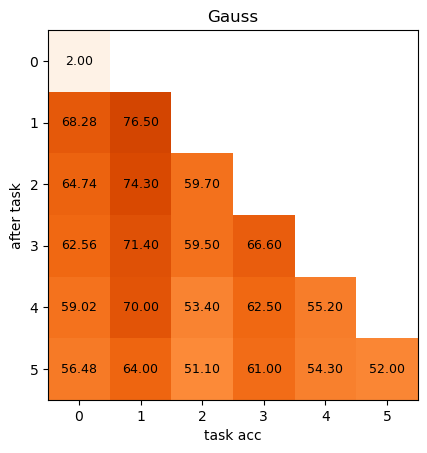

In [11]:
print_results_chart('./results/full_gauss_tukey_on.txt', 'Gauss')

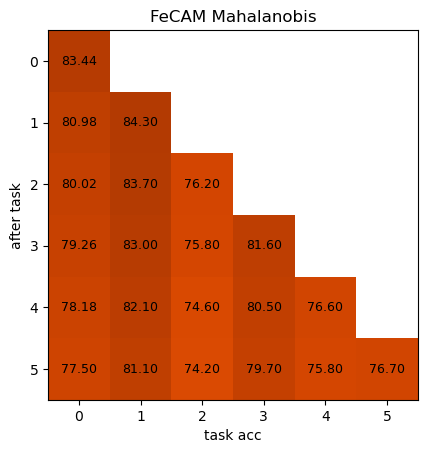

In [12]:
print_results_chart('./results/log_t5.txt', 'FeCAM Mahalanobis')

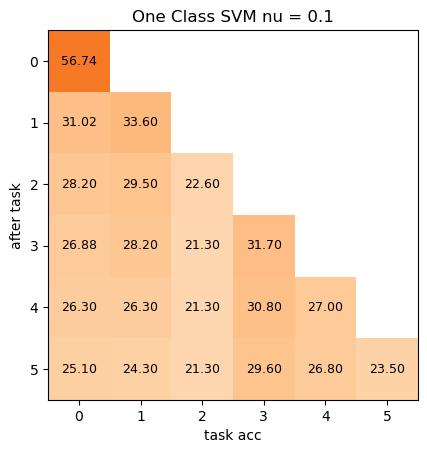

In [13]:
print_results_chart('./results/ocsvm-first-run0_1.txt', 'One Class SVM nu = 0.1')